# I. Introduction
  
> In a pandemic situation, clinicians and researchers are in urgent need of rapid and quality information that will help them to inform diagnostics and therapeutics relating to the disease. Traditional research models producing trustworthy and methodologically sound results takes time, which does not fit well with a pandemic context where research has to be fast-tracked. The ongoing coronavirus disease 2019 (COVID-19) pandemic has demonstrated the volume and velocity of scientific information that can be produced in a short period of time. For COVID-19, some of these traditional delays have been circumvented as many medical journals have prioritized publications related to COVID-19 and there is greater use of preprint servers to make research findings immediately available in an open format. 
> 
> Whilst not everything posing as trustworthy research is truly so, medical literature (pre-print and otherwise) is yet an important source of information in the pandemic context. However, staying current with the growing body of literature is a challenge. Generally, when publishing their research, the authors indicate what other work has been done in the past, describe their data and results and cite previous literature to support or refute their interpretation of the data. 
> 
> In the context of COVID-19 pandemic, researchers and clinicians require a reliable model to mine published literature for novel insights, emerging risk factors and therapeutics to inform their work in combating the COVID-19 pandemic. In this context, we present an innovative text mining and analytical tool that will aid clinicians and researchers in extracting valuable insights from large datasets of literature. In the following sections, we describe the principles, techniques and results of our approach.

> # II. Approach
> 
> Information retrieval, in a text mining context, involves a user submitting a query to a search engine and receiving relevant results aligning with their submitted query in return. In a pandemic context, information extraction from medical literature involves the identification of entities such as diseases, as well as the identification of complex relationships between these entities. Query results extracted from the literature may be used for the purposes of populating databases or data curation. From these extractions, knowledge bases can be built that contain the collected statements with references to the literature. Knowledge discovery involves identifying undiscovered or hidden knowledge by applying data-mining algorithms to the collection of facts gathered from the literature. From here, text mining results may be used to suggest new hypotheses which can be used to either validate or disprove existing hypotheses or to help direct future research. 
> 
> For the purpose of the task, we formed a team including **data scientists, software engineers, clinicians and medical researchers** to enable a credible and informed approach in developing the text-mining model. Our text-mining model automates the knowledge discovery process aiding researchers and clinicians in their pursuit of appropriate treatment and management of COVID-19 cases. This process is achieved by identifying whether a given medical article is related to COVID-19, and it’s relevance to the competition task of identifying clinical risk factors embedded in the literature. The assumption here is that supplied databases collectively have relevant information suitable for extraction. While the tool we developed here was customised to automatically identify COVID19 related risk factors, this model can be potentially expanded to extract useful information from medical literature and building knowledge bases. Key steps involved in building the solution are -
> 
>     1. All documents provided in the CORD19 Data were pre-processed, by grabbing all sections within documents and categorising them appropriately into Introduction, Discussion, Results OR Results and Discussions fields. 
> 
>     2. Introduction, Discussion and Results were merged to form another field/column called the Body.
> 
>     3. All documents that don't have Abstract and Body were dropped - which means they don’t have any of Intro/Discussion/Body.
> 
>     4. All documents were indexed into a search engine (acting as the data corpus from which information is extracted).
> 
>     5. Once the tasks are queried- results are displayed and a knowledge discovery process is applied to the extracted information to gain relevant entities and valuable insights. Using those entities - algorithms are applied and graphs like Principal Component Analysis and Temporal Value Affinity charts are plotted. 
> 

# III. Methodology

## III.I. Section headers segmentation

> We considered presenting search query results in the format of structured abstracts, which researchers and clinicians are used to when reviewing literature but also the results are segmented for ease of review and understanding. The results are segmented as introduction, results, methods and discussion as per below logic.

> Table 1.Organisation of Headings
<table style="width:100%">
  <tr>
    <th><center>Normal Paper Headings</center></th>
    <th><center>Result Headings</center></th> 
  </tr>
  <tr>
    <td>Introduction, Background, Challenges, Overview, epidemiology, Objectives, Purpose of the study</td>
    <td><center>Introduction</center></td> 
  </tr>
  <tr>
 <td>Methodology, Material and methods, Ethics Statement, Data Analysis, Statistical Analysis, Study population, Experimental design, Case description, virus detection,  RNA extraction, RT-PCR,  immunoblot analysis, data management and analysis, viral sequencing, immunohistochemistry</td>
   <td><center>Introduction</center></td>
  </tr>
  <tr>
    <td>Results,  diagnostic features, case report, sensitivity analysis,  demographic and clinical characteristics,  patient characteristics,  supplementary materials,  clinical outcomes,  secondary outcomes,  mortality, adverse events, </td>
  <td><center>Results</center></td> 
  </tr>
  <tr>
 <td>Discussion, conclusions,  commentary, summary, limitations, strengths and limitations, perspectives, key points, general comments, recommendations, future directions, review,  key messages, synopsis</td>
  <td><center>Discussion</center></td>
</tr>
</table>

<br/>
<br/>

## III.II. Creating labels and associated weights

> To ensure the relevancy of results for users we created **labels** outlined in the table. The logic behind the labelling is that relevant terms presented in the introduction, results and discussion would indicate that the association is well established, and the study would be adding additional evidence. If risk factors were absent in the introduction but were present in the results and discussion this would indicate a novel finding. Additional combinations are stated in table 2.

> Table 2: Label Definition
 <table style="width:100%">
  <tr>
    <th><center>Introduction</center></th>
    <th><center>Results</center></th> 
    <th><center>Discussion</center></th> 
    <th><center>Label</center></th> 
  </tr>
  <tr>
    <td><center>Present</center></td>
    <td><center>Present</center></td> 
    <td><center>Present</center></td> 
    <td><center>prior-newdata</center></td> 
  </tr>
  <tr>
    <td><center>Present</center></td>
    <td><center>Absent</center></td> 
    <td><center>Present</center></td> 
    <td><center>prior-strong</center></td> 
  </tr>
  <tr>
    <td><center>Present</center></td>
    <td><center>Absent</center></td> 
    <td><center>Absent</center></td> 
    <td><center>prior</center></td> 
  </tr>
  <tr>
    <td><center>Absent</center></td>
    <td><center>Absent</center></td> 
    <td><center>Present</center></td> 
    <td><center>speculative</center></td> 
  </tr>
  <tr>
    <td><center>Absent</center></td>
    <td><center>Present</center></td> 
    <td><center>Present</center></td> 
    <td><center>novel</center></td> 
  </tr>
  <tr>
    <td><center>Absent</center></td>
    <td><center>Present</center></td> 
    <td><center>Absent</center></td> 
    <td><center>unknown</center></td> 
  </tr>
  <tr>
    <td><center>Present</center></td>
    <td colspan="2"><center>Present</center></td> 
    <td><center>prior-newdata</center></td> 
  </tr>
  <tr>
    <td><center>Present</center></td>
    <td colspan="2"><center>Absent</center></td> 
    <td><center>prior</center></td> 
  </tr>
  <tr>
    <td><center>Absent</center></td>
    <td colspan="2"><center>Present</center></td> 
    <td><center>novel</center></td> 
  </tr>
</table>
<br/>
<br/>

> Table 3: Label weights
<table style="width:100%">
  <tr>
    <th><center>Labels</center></th>
    <th><center>Weights</center></th> 
  </tr>
  <tr>
    <td><center>Prior-newdata</center></td>
    <td><center>6</center></td> 
  </tr>
  <tr>
 <td><center>Prior-strong</center></td>
   <td><center>5</center></td>
  </tr>
  <tr>
    <td><center>Prior</center></td>
  <td><center>4</center></td> 
  </tr>
  <tr>
 <td><center>Novel</center></td>
  <td><center>3</center></td>
</tr>
  <tr>
 <td><center>Speculative</center></td>
  <td><center>2</center></td>
</tr>
  <tr>
 <td><center>Unknown</center></td>
  <td><center>1</center></td>
</tr>
</table>

<br/>
<br/>


## III.III. Synonyms of COVID-19
> The following synonyms of COVID-19 have been taken into consideration to ensure that the search results are exhaustive and thorough.<br/>
>
> Table 4: Synonyms of COVID-19
>
> * COVID-19
> * COVID19
> * 2019-nCoV
> * 2019nCoV
> * Coronavirus
> * SARS-CoV-2
> * SARSCov2
> * novel Coronavirus


## III.IV. Techniques applied for visualization
  
  > **Principal Component Analysis**<br><br>
  Throughout the model, principal component analysis has been performed at multiple places to reduce dimensionality. Principal component analysis (PCA) is a technique for reducing the dimensionality of large datasets, increasing interpretability but at the same time minimizing information loss.You can read more about PCA [here](https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0).
  
  > **K Means Clustering**<br><br>
  Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.<br>
  [Here](https://www.youtube.com/watch?v=4b5d3muPQmA) is a small video by StatQuest explaining K means algorithm with video 


# IV. Code 
## IV. I. Installing necessary packages and libraries

> Ensure that your internet is turned 'on' from the 'Settings'

In [ ]:
#Install needed packages and NLP models
!pip install -U pysolr
!pip install -U scispacy
!pip install -U gensim
!pip install -U jsonpath-ng
!pip install -U pyvis
!pip install -U pyLDAvis
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_md-0.2.4.tar.gz 
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_craft_md-0.2.4.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_jnlpba_md-0.2.4.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_bc5cdr_md-0.2.4.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_bionlp13cg_md-0.2.4.tar.gz

In [ ]:
!wget -O solr-8.5.0.zip "https://archive.apache.org/dist/lucene/solr/8.5.0/solr-8.5.0.zip";
!unzip solr-8.5.0.zip

In [ ]:
!ls

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import os
import json
import math
import glob
import re
import time
import pysolr
import csv
import time
import scipy
import spacy
import scispacy
import multiprocessing
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from os import path
from pandas import ExcelWriter
from pandas import ExcelFile
from jsonpath_ng.ext import parse
from collections import defaultdict
from collections import Counter
from collections import OrderedDict
from IPython.core.display import display, HTML
from IPython.display import IFrame
from pyvis.network import Network
from datetime import date
import dateutil.parser as dparser
import seaborn as sns
import matplotlib.pyplot as plt
import concurrent.futures
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import nltk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim

init_notebook_mode(connected=True) #do not miss this line

stopwords = nltk.corpus.stopwords.words('english')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##  IV. II. Data Preprocessing

> The papers present as JSON files are read into a data frame, cleaned and transformed and then converted into a CSV file, which is used for further analysis. Subject matter expertise determined that the information critical to risk factors of COVID-19 is present in certain sections of the literature. <br><br>
As part of the analysis, these sections were then categorized into seven categories: 'Abstract', 'Introduction', 'background', 'Discussion', 'Results', 'Results and Discussion'  and  'methods,results'. Further, it was determined that content in **'Introduction', 'Discussion', 'Results' and 'Results and Discussion' is most relevant** to the analysis. ‘Results’ and ‘Results and Discussion’ are treated under ‘Result’.

<table style="width:100%">
  <tr>
    <th><center>Paper ID</center></th>
    <th><center>Introduction</center></th> 
    <th><center>Discussion</center></th>
    <th><center>Result</center></th>
  </tr>
  <tr>
    <td><center>PMC5652284</center></td>
    <td>Zika virus is a single-stranded RNA virus prim...</td> 
    <td>Recently, Xu et al. performed a screen of ~ 60...</td>
    <td>Of the 16 EBOV entry inhibitors reported previ...</td>
  </tr>
</table>
<br/><br/>

> Individual papers are processed and their paper IDs, titles, abstracts and introductions, discussions and results from the body-text are stored in separate columns. From the metadata file, for every paper based on the paper ID, the publish time is taken, transformed into the desired format and stored in a column. Similarly, the source of the papers is looked up in the metadata file based on the paper ID, and the title in the absence of paper ID, and stored as the source of the paper. 
> 
> The ‘introduction’, ‘discussion’, ‘results’ and ‘abstract’ columns are cleaned up for the removal of unnecessary non-alphanumeric characters and hyperlinks and stripped off whitespaces from both ends of the text. A new column ‘body’ is created as the concatenation of ‘introduction’, ‘discussion’ and ‘results’.
> 
> A list of words that are synonymous with COVID-19 (refer Table 4) is defined and then searched for in the body of all papers. Papers in which any of these words are found are flagged with ‘has_covid’ = True and others are flagged with ‘has_covid’ = False.
> 
> The data frame is then treated to drop duplicate rows (or papers), wherein duplicates are identified based on the combination of title and abstract.
> 
> The final dataframe then has columns: 'paper_id', 'title', 'source', 'abstract', 'introduction', 'discussion', 'result', 'body',  'publish_time' and 'has_covid'; and is written to a CSV file ‘CORD-19.csv’.


In [2]:
def clean_text(text) :
    text = re.sub(r" ?\([^)]*\)", "", text)
    text = re.sub(r" ?\[[^)]*\]", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"  ", " ", text)
    return text.strip()

In [3]:
def preprocess_data() :
    print("Starting preprocessing of Data....\n","Please be patient, custom pre-processing can take approximately 25-30 mins....")
    start = time.time()

    meta_df = pd.read_csv('COVID-19-DATASETS/metadata.csv', sep=',', header=0)
    meta_columns = list(meta_df.columns)
    meta_df.fillna('', inplace=True)

    # Filter to pick only needed sections
    include_set = ['Abstract','Introduction', 'background', 'Discussion', 'Results', 'Results and Discussion', 'methods,results']

    # Throw execption is the Section Heads excel file is not available
    section_df = pd.DataFrame()
    try :
        print('Loading SECTIONHEADERS4PCKR...')
        section_df = pd.read_excel('COVID-19-DATASETS/SECTIONHEADERS4PCKR.xlsx', sheet_name='Sheet1')
    except Exception as ex :
        print('Preprocessing cannot run without SECTIONHEADERS4PCKR.xlsx:', ex)
        raise
        
    section_df.dropna(subset=['Section Heads'], inplace=True)
    section_df = section_df[section_df['Section Heads'].isin(include_set)]
        
    # Categories/Targets to pick from Section Heads column
    introduction_categories = ["Introduction"]
    discussion_categories = ["Discussion"]
    result_categories = ["Results", "Results and Discussion", 'methods,results']

    introduction_df = section_df[section_df['Section Heads'].isin(introduction_categories)]
    discussion_df = section_df[section_df['Section Heads'].isin(discussion_categories)]
    result_df = section_df[section_df['Section Heads'].isin(result_categories)]

    intro_list = introduction_df.iloc[:, 0].tolist()
    discussion_list = discussion_df.iloc[:, 0].tolist()
    result_list = result_df.iloc[:, 0].tolist()

    intro_list = list(map(lambda x: str(x).strip(), intro_list))
    discussion_list = list(map(lambda x: str(x).strip(), discussion_list))
    result_list = list(map(lambda x: str(x).strip(), result_list))

    path = 'COVID-19-DATASETS/CORD-19-research-challenge/'
    paths = [p for p in glob.glob(path + "**/*.json", recursive=True)]
    files_size = len(paths)

    col_names = ['paper_id','title','source', 'abstract','introduction','result','discussion','body', 'publish_time', 'has_covid', 'url']
    clean_df = pd.DataFrame(columns=col_names)

    covid_syns = ['COVID-19','COVID19','2019-nCoV','2019nCoV','Coronavirus','SARS-CoV-2','SARSCov2','novel Coronavirus']

    target_empty_count = 0

    abstract_expr = parse('$.abstract[*].text')

    for path in paths:
        with open(path) as f:
            intro_text_list = list()
            discussion_text_list = list()
            result_text_list = list()

            data = json.load(f)

            abstract_texts = [match.value for match in abstract_expr.find(data)]

            body_nodes = data['body_text']

            for entry in body_nodes :
                section_name = entry['section']
                section_name = section_name.strip().lower()
                entry_text = entry['text']

                if section_name.strip() in intro_list:
                    intro_text_list.append(entry_text)

                if section_name.strip() in discussion_list:
                    discussion_text_list.append(entry_text)

                if section_name.strip() in result_list:
                    result_text_list.append(entry_text)

            if len(intro_text_list) == 0 and len(discussion_text_list) == 0 and len(result_text_list) == 0 :
                target_empty_count = target_empty_count + 1


            id = data['paper_id']
            title = data['metadata']['title']
            url=''
            try :                 
                url = meta_df.loc[meta_df['sha'] == id, 'url'].iloc[0]
            except Exception as ex:
                pass
            
            pubtime_df = meta_df[meta_df.sha == id]['publish_time']
            pubtime_dict = pubtime_df.to_dict()
            pubtime = ''
            for pubtime_field_key in pubtime_dict.keys():
                temp_pubtime_str = pubtime_dict.get(pubtime_field_key)
                orig_temp_pubtime_str = temp_pubtime_str
                try:
                    temppubdate = dparser.parse(orig_temp_pubtime_str,fuzzy=True).date()
                    pubtime = temppubdate.strftime("%Y-%m-%dT%H:%M:%SZ")
                except Exception as e:
                    temp_pubtime_str_parts = temp_pubtime_str.split(' ')
                    if len(temp_pubtime_str_parts) > 2 :
                        try :
                            temp_pubtime_str = temp_pubtime_str_parts[0] + ' ' + temp_pubtime_str_parts[1] + ' ' + temp_pubtime_str_parts[2]
                            temppubdate = dparser.parse(temp_pubtime_str,fuzzy=True).date()
                            pubtime = temppubdate.strftime("%Y-%m-%dT%H:%M:%SZ")
                        except Exception as ex:
                            pubtime = ''
                    else:
                        pubtime = ''             

            sha_df = meta_df[meta_df.sha == id]['source_x']
            meta_dict = sha_df.to_dict()
            source = ''
            for meta_field_key in meta_dict.keys():
                source = meta_dict.get(meta_field_key)

            if not source:
                title_df = meta_df[meta_df.title == title]['source_x']
                meta_dict = title_df.to_dict()
                for meta_field_key in meta_dict.keys():
                    source = meta_dict.get(meta_field_key)

            abstract = clean_text(" ".join(abstract_texts))
            introduction = clean_text(" ".join(intro_text_list))
            discussion = clean_text(" ".join(discussion_text_list))
            result = clean_text(" ".join(result_text_list))
            body = " ".join([introduction, discussion, result])

            has_covid = 'false'

            res = [ele for ele in covid_syns if (ele.lower() in body.lower())]
            if(len(res)  > 0):
                has_covid = 'true'

            if len(body.strip()) > 0 or len(abstract) > 0:
                new_row = {'paper_id': id, 'title': title.strip(), 'source': source,'abstract': abstract.strip(),
                           'introduction': introduction.strip(),'result': result.strip(),'discussion': discussion.strip(),
                            'body': body.strip(), 'publish_time': pubtime,'has_covid': has_covid, 'url':url}
                clean_df = clean_df.append(new_row, ignore_index=True)

    # Drop duoplicate papers
    clean_df.drop_duplicates(subset=['title','abstract'], keep='first', inplace=False)
    clean_df.to_csv('COVID-19-DATASETS/CORD19S4PCKR.csv', index=True)

    print('Final DataFrame Shape - ', clean_df.shape)
    print("Papers that dont have Intro, Discussion or Result  - ", target_empty_count)
    print('Total Papers processed - ', files_size)

    print('Time Elaspsed - ', time.time() - start)
    

## IV.III. Configure Search Engine

> Solr, an open-source enterprise search platform, was employed as a foundational query search engine for the text mining model. Solr provides distributed indexing and load-balanced querying, which suits the challenge objectives. The search platform was enjoined with scispaCy, a package recommended by the organisers, to process the search results for biomedical or clinical terms. Initially, key terms aligning with COVID-19 including all its associated synonyms were built into the search process to filter results. The search process then incorporated the SciSpacy NER model to further filter the results. 

In [4]:
!solr-8.5.0/bin/solr start -force

*** [WARN] *** Your open file limit is currently 4096.  
 It should be set to 65000 to avoid operational disruption. 
 If you no longer wish to see this warning, set SOLR_ULIMIT_CHECKS to false in your profile or solr.in.sh
*** [WARN] ***  Your Max Processes Limit is currently 1418. 
 It should be set to 65000 to avoid operational disruption. 
 If you no longer wish to see this warning, set SOLR_ULIMIT_CHECKS to false in your profile or solr.in.sh
Waiting up to 180 seconds to see Solr running on port 8983 [|] [/] [-] [\] [|] [/] [-] [\] [|] [/] [-] [\] [|]  
Started Solr server on port 8983 (pid=2669). Happy searching!

  

In [ ]:
!solr-8.5.0/bin/solr create -c covid19 -s 1 -rf 1 -force

In [ ]:
# Using _default configset with data driven schema functionality. NOT RECOMMENDED for production use.
!solr-8.5.0/bin/solr config -c covid19 -p 8983 -action set-user-property -property update.autoCreateFields -value false

In [ ]:
#Set Up Synonyms

!echo 'COVID-19,covid19,2019-nCoV,2019nCoV,Coronavirus,SARS-CoV-2,SARSCov2,novel Coronavirus' > solr-8.5.0/server/solr/covid19/conf/synonyms.txt;
!echo 'heart,cardiac,tachycardia,myocardial' >> solr-8.5.0/server/solr/covid19/conf/synonyms.txt;
!echo 'pulmonary,respiratory' >> solr-8.5.0/server/solr/covid19/conf/synonyms.txt;

In [ ]:
!cat solr-8.5.0/server/solr/covid19/conf/synonyms.txt

In [ ]:
#Reload the covid19 core/collection because we added new synonyms. Need reload as it will affect index
#Whenever new synonyms are added we need to reindex as synonyms are applied both on index and query analyzers
!curl 'http://localhost:8983/solr/admin/cores?action=RELOAD&core=covid19'

In [ ]:
#Add custom field Type that wont tokenize phrases for fields like source etc
!curl -X POST -H 'Content-type:application/json' --data-binary '{"add-field-type" : {"name":"keywordText","class":"solr.TextField", "positionIncrementGap":"100", "indexAnalyzer" : {"tokenizer":{"class":"solr.KeywordTokenizerFactory" }, "filters":[{"class":"solr.TrimFilterFactory"},{"class":"solr.StopFilterFactory", "ignoreCase":true, "words":"lang/stopwords_en.txt"},{"class":"solr.ManagedSynonymGraphFilterFactory", "managed":"english" },{"class":"solr.RemoveDuplicatesTokenFilterFactory"},{"class":"solr.FlattenGraphFilterFactory"}]},"queryAnalyzer" : {"tokenizer":{"class":"solr.KeywordTokenizerFactory" },"filters":[{"class":"solr.TrimFilterFactory"},{"class":"solr.StopFilterFactory", "ignoreCase":true, "words":"lang/stopwords_en.txt"},{"class":"solr.ManagedSynonymGraphFilterFactory", "managed":"english" },{"class":"solr.RemoveDuplicatesTokenFilterFactory"}]}}}' http://localhost:8983/solr/covid19/schema

In [ ]:
#Create SOLR field definitions
!curl -X POST -H 'Content-type:application/json' --data-binary '{"add-field": {"name":"title", "type":"text_en_splitting_tight", "multiValued":false, "stored":true, "indexed":true}}' http://localhost:8983/solr/covid19/schema;
!curl -X POST -H 'Content-type:application/json' --data-binary '{"add-field": {"name":"abstract", "type":"text_en_splitting_tight", "multiValued":false, "stored":true, "indexed":true}}' http://localhost:8983/solr/covid19/schema;
!curl -X POST -H 'Content-type:application/json' --data-binary '{"add-field": {"name":"source", "type":"keywordText", "multiValued":false, "stored":true, "indexed":true}}' http://localhost:8983/solr/covid19/schema;
!curl -X POST -H 'Content-type:application/json' --data-binary '{"add-field": {"name":"introduction", "type":"text_en_splitting_tight", "multiValued":false, "stored":true, "indexed":true}}' http://localhost:8983/solr/covid19/schema;
!curl -X POST -H 'Content-type:application/json' --data-binary '{"add-field": {"name":"discussion", "type":"text_en_splitting_tight", "multiValued":false, "stored":true, "indexed":true}}' http://localhost:8983/solr/covid19/schema;
!curl -X POST -H 'Content-type:application/json' --data-binary '{"add-field": {"name":"result", "type":"text_en_splitting_tight", "multiValued":false, "stored":true, "indexed":true}}' http://localhost:8983/solr/covid19/schema;
!curl -X POST -H 'Content-type:application/json' --data-binary '{"add-field": {"name":"body", "type":"text_en_splitting_tight", "multiValued":false, "stored":true, "indexed":true}}' http://localhost:8983/solr/covid19/schema;
!curl -X POST -H 'Content-type:application/json' --data-binary '{"add-field": {"name":"publish_time", "type":"pdate", "multiValued":false, "stored":true, "indexed":true}}' http://localhost:8983/solr/covid19/schema;
!curl -X POST -H 'Content-type:application/json' --data-binary '{"add-field": {"name":"url", "type":"string", "multiValued":false, "stored":true, "indexed":true}}' http://localhost:8983/solr/covid19/schema;        
!curl -X POST -H 'Content-type:application/json' --data-binary '{"add-field": {"name":"has_covid", "type":"boolean", "multiValued":false, "stored":true, "indexed":true}}' http://localhost:8983/solr/covid19/schema;

## IV.III.I Create Search Index

> A search engine is set up using Apache Solr, wherein one can search for a term of interest and be shown the papers that have information related to the query with keywords highlighted. By default, the result of a query is at the most five papers but this can be changed to another number. The medical entities that are mapped by the Scispacy models in the search results are also highlighted in the final result shown.
> 
> More information regarding Solr can be found in the Solr documentation (see References).


In [5]:
solr = pysolr.Solr('http://localhost:8983/solr/covid19/', timeout=10)

## IV.IV. Load Data

> To expedite the run time for processing code, we have included the .csv file (Cord-19.csv) that is generated after the pre-processing of all the JSON files are completed. If the CSV file is not present, the pre-processing code will run (~25-30 mins) and the CSV file will be regenerated

In [19]:
generic_model = spacy.load('en_core_sci_md')

#Load preprocessed CSV data
csv_path = 'COVID-19-DATASETS/CORD19S4PCKR.csv'

if not path.exists(csv_path):
    print('Calling Preprocessing...')
    preprocess_data()
    
df = pd.read_csv(csv_path, sep=',', header=0)
df.fillna('', inplace=True)
df.dropna(axis=0, how='all', thresh=None, subset=['title','abstract','body'], inplace=False)
#df.drop_duplicates(subset=['title'], keep='first', inplace=True)
#df.drop_duplicates(subset=['abstract'], keep='first', inplace=True)
df = df[df[['abstract','body']].ne('').any(axis=1)]
print('DF candidate_list size - ', df.shape)

df.head(2)

df.isnull().sum()

DF candidate_list size -  (49446, 12)


Unnamed: 0      0
paper_id        0
title           0
source          0
abstract        0
introduction    0
result          0
discussion      0
body            0
publish_time    0
has_covid       0
url             0
dtype: int64

## IV.V. Indexing row as a document in Solr Search engine

> A search engine is set up using Apache Solr, wherein one can search for a term of interest and be shown the papers that have information related to the query with keywords highlighted. By default, the result of a query is at the most five papers but this can be changed to another number. The medical entities that are mapped by the Scispacy models in the search results are also highlighted in the final result shown.
> 
> More information regarding Solr can be found in the Solr documentation (see References).


In [ ]:
# Index each pandas row as a document into SOLR search engine

covid_syns = ('SARSCoV2','SARS-CoV-2', '2019-nCoV','2019nCoV','COVID-19', 'COVID19','coronavirus', 'corona virus' 'novel coronavirus')

list_for_solr=[]
counter = 0
for index, row in df.iterrows():
    id = row['paper_id']
    title = row["title"]
    source = row["source"]    
    abstract = row["abstract"]
    introduction = row["introduction"]
    discussion = row["discussion"]
    result = row["result"]
    publish_time = row["publish_time"] 
    url = row["url"]    
    body = row["body"]  # Cocatenated text of all text fields abstract, introduction, discussion, result
    
    if((title and title.isspace()) and (abstract and abstract.isspace()) and (body and body.isspace())):
        continue
        
    has_covid = 'false'
    if any(words in body for words in covid_syns):
        has_covid = 'true'
    
    solr_content = {}
    solr_content['id'] = id
    solr_content['title'] = title
    solr_content['source'] = source
    solr_content['abstract'] = abstract
    solr_content['introduction'] = introduction
    solr_content['discussion'] = discussion
    solr_content['result'] = result    
    solr_content['body'] = body
    solr_content['has_covid'] = has_covid
    solr_content['publish_time'] = publish_time    
    solr_content['url'] = url    
        
    list_for_solr.append(solr_content)
    
    if index % 1000 == 0:
        solr.add(list_for_solr)
        list_for_solr = []
        counter = counter + 1000
        print('Indexed Papers - ', counter)
        
#Commit is very costly use it sparingly        
solr.commit()
print('Indexing Finished !')

## IV.VI. Extract Entities

This function takes in a list of NLP models (sciscpaCy) and text as parameters and runs each model on the text to generate entities and appends them to the list. This list is then returned. It is worthwhile to note that since all the four models are running on the text, each entity created will have multiple tags associated with it. This is particularly useful as each model can diagnose a particular entity with a different type.


In [8]:
def extract_entities(scimodels, text) :
    entities = {}
    
    for nlp in scimodels :
        doc = nlp(text)
        for ent in doc.ents:
            entity = ent.text
            if ent.label_ in entities :
                if entities[ent.label_].count(ent.text) == 0:
                    entities[ent.label_].append(ent.text)
            else :
                entities[ent.label_] = [ent.text]

    return entities

## IV.VII. Initialize NLP models

This function takes a list of the names of models, loads them one by one and returns the names of the models. More specifically, four spaCy NER models are loaded here and their encompassing entities are listed below.

<table style="width:100%">
  <tr>
    <th><center>Model</center></th>
    <th><center>Training Corpus</center></th> 
    <th><center>Entity Type</center></th> 
  </tr>
  <tr>
    <td><center>en_ner_craft_md</center></td>
    <td><center>CRAFT</center></td> 
    <td>GGP, SO, TAXON, CHEBI, GO, CL</td> 
  </tr>
  <tr>
    <td><center>en_ner_jnlpba_md</center></td>
    <td><center>JNLPBA</center></td>
    <td>DNA, CELL_TYPE, CELL_LINE, RNA, PROTEIN</td>  
  </tr>
  <tr>
    <td><center>en_ner_bc5cdr_md</center></td>
    <td><center>BC5CDR</center></td> 
    <td>DISEASE, CHEMICAL</td> 
  </tr>
  <tr>
    <td><center>en_ner_bionlp13cg_md</center></td>
    <td><center>BIONLP13CG</center></td>
    <td>CANCER, ORGAN, TISSUE, ORGANISM, CELL, AMINO_ACID, GENE_OR_GENE_PRODUCT, SIMPLE_CHEMICAL, ANATOMICAL_SYSTEM, IMMATERIAL_ANATOMICAL_ENTITY, MULTI-TISSUE_STRUCTURE, DEVELOPING_ANATOMICAL_STRUCTURE, ORGANISM_SUBDIVISION, CELLULAR_COMPONENT</td>  
</tr>
</table>


In [9]:
def initilize_nlp_models(model_names):
    scimodels = {}
    for name in model_names:
        scimodels[name] = spacy.load(name)
    
    print('Models Loaded')
    return scimodels

In [10]:
def search_task_answers(search_results, display_on=False) :
    answers_list = list()
    
    for search_result in search_results:
        doc_hl_dict = {}
        
        id = search_result.get('id', 'MISSING')
        title = search_result.get('title', 'MISSING')
        source = search_result.get('source', 'MISSING')        
        publish_time = search_result.get('publish_time')
        url = search_result.get('url', 'MISSING')        
        
        doc_highlights = search_results.highlighting[id]
        
        doc_hl_dict['id'] = id
        doc_hl_dict['title'] = title
        doc_hl_dict['source'] = source
        doc_hl_dict['publish_time'] = publish_time
        doc_hl_dict['url'] = url        
                
        if len(doc_highlights) > 0 and display_on:
            display(HTML(f'<h4><a href="{url}" target="_blank">{title}</a>\n</h4>'))
            #display(HTML(f'<h4><i>{id}. {title}\n</i></h4>'))

        for doc_hl_field in doc_highlights:
            hl_snippets = doc_highlights[doc_hl_field]
        
            if len(hl_snippets) > 0 :
                answer_snippet = ''
                
                if display_on :
                    display(HTML(f'\t<h5>{doc_hl_field}\n</h5>\n'))
            
                for index, snippet in enumerate(hl_snippets, start=1):
                    answer_snippet = answer_snippet.strip() + " " + snippet.strip()
                    
                    if display_on :
                        display(HTML(f'<blockquote>{index}. {snippet.strip()}\n</blockquote>'))
                                  
                doc_hl_dict[doc_hl_field] = answer_snippet.strip()
                    
        if len(doc_hl_dict) > 0:
            answers_list.append(doc_hl_dict)
        
    return answers_list

In [11]:
def search(query, rows=5, mark=False):
    # Search for data
    if mark :
        search_results = solr.search(query, **{
        'fq':'has_covid:true',
        'rows' : rows,
        'qf':'title^50.0 abstract^40.0 introduction^30.0 discussion^20.0 result^50.0 body^10.0',
        'pf':'title^60.0 abstract^50.0 introduction^40.0 discussion^30.0 result^60.0 body^20.0',
        'hl': 'true',
        'hl.bs.type': 'SENTENCE',
        'hl.method' : 'unified',
        'hl.snippets' : 5,
        'hl.usePhraseHighlighter': 'true',
        'hl.highlightMultiTerm' : 'true',
        'hl.tag.pre':'<mark>',
        'hl.tag.post':'</mark>',
        'df':'body',
        'hl.fl':'introduction,discussion,result'
        })
    else:
        search_results = solr.search(query, **{
        'fq':'has_covid:true',
        'rows' : rows,
        'qf':'title^50.0 abstract^40.0 introduction^30.0 discussion^20.0 result^50.0 body^10.0',
        'pf':'title^60.0 abstract^50.0 introduction^40.0 discussion^30.0 result^60.0 body^20.0',
        'hl': 'true',
        'hl.bs.type': 'SENTENCE',
        'hl.method' : 'unified',
        'hl.snippets' : 5,
        'hl.usePhraseHighlighter': 'true',
        'hl.highlightMultiTerm' : 'true',
        'hl.tag.pre':'',
        'hl.tag.post':'',
        'df':'body',
        'hl.fl':'introduction,discussion,result'
        })        

    num_docs_found = search_results.hits
    num_search_results = len(search_results)
    
    return num_docs_found, search_results

In [12]:
# Map entities existence in intro-result-discussion respectively to label values
label_def = {'111':'prior-newdata','101':'prior-strong','100':'prior','001':'speculative','010':'unknown', '011':'novel'}
model_names = ['en_ner_craft_md','en_ner_jnlpba_md','en_ner_bc5cdr_md','en_ner_bionlp13cg_md']
scimodels = initilize_nlp_models(model_names)

Models Loaded


In [13]:
def populate_labels(task_answers) :
    field_list = ['introduction','discussion', 'result']

    for doc_answer_dict in task_answers:
        all_entities = set()
        intro_entities = set()
        discussion_entities = set()
        result_entities = set() 

        for field_name, answer_text in doc_answer_dict.items():
            if field_name in field_list:
                chosen_models = list(scimodels.values())
                
                ent_dict = extract_entities(chosen_models, answer_text)
                ent_list = set()
                
                for ner_type, model_ent_list in ent_dict.items():
                    ent_list.update(model_ent_list)                

                all_entities.update(ent_list)
                if field_name == 'introduction' :
                    intro_entities.update(ent_list)
                elif field_name == 'discussion' :
                    discussion_entities.update(ent_list)
                else :
                    result_entities.update(ent_list)

        # Now set up labels for entities
        prior_newdata_entities = set()
        prior_strong_entities = set()
        prior_entities = set()
        speculative_entities = set()
        unknown_entities = set()    
        novel_entities = set()

        for a_ent in all_entities :
            if a_ent in intro_entities and a_ent in result_entities and a_ent in discussion_entities : 
                prior_newdata_entities.add(a_ent)
            elif a_ent in intro_entities and a_ent not in result_entities and a_ent in discussion_entities :
                prior_strong_entities.add(a_ent)
            elif a_ent in intro_entities and a_ent not in result_entities and a_ent not in discussion_entities :
                prior_entities.add(a_ent)
            elif a_ent not in intro_entities and a_ent in result_entities and a_ent not in discussion_entities : 
                unknown_entities.add(a_ent)
            elif a_ent not in intro_entities and a_ent in result_entities and a_ent in discussion_entities :
                novel_entities.add(a_ent)
            else :
                pass
            
        if(len(prior_newdata_entities) > 0) :
            doc_answer_dict['prior-newdata'] = list(prior_newdata_entities)

        if(len(prior_strong_entities) > 0) :
            doc_answer_dict['prior-strong'] = list(prior_strong_entities)          

        if(len(prior_entities) > 0) :
            doc_answer_dict['prior'] = list(prior_entities)             

        if(len(speculative_entities) > 0) :
            doc_answer_dict['speculative'] = list(speculative_entities)

        if(len(unknown_entities) > 0) :
            doc_answer_dict['unknown'] = list(unknown_entities)           

        if(len(novel_entities) > 0) :
            doc_answer_dict['novel'] = list(novel_entities)           

    return task_answers

In [14]:
def cosine_score(x):
        d = []
        for i in range(len(x)):
            for j in range(i+1,len(x)):
                doc1= generic_model(x[i])
                doc2= generic_model(x[j])
                d.append({

                    'Title1': x[i],
                    'Title2': x[j],
                    'Score': doc1.similarity(doc2)*30
                }
            )

        return d

class network_graph:
    
    def __init__(self,search_result):
        data = pd.DataFrame(search_result)
        self.data = data
        col_list = data.columns
        drop_list = ['introduction','discussion','result']
        self.new_cols = []
        for cols in col_list:
            if cols not in drop_list:
                self.new_cols.append(cols)

        
    def extract_titles(self,search_result):
        title_list = []
        for title in range(len(search_result)):
            title_list.append(search_result[title]['title'])
            
        title_dict_temp = cosine_score(title_list)
        self.title_df = pd.DataFrame(title_dict_temp)
        title_df_temp1 = self.title_df[['Title1']]
        title_df_temp1.rename(columns={'Title1':'Title'},inplace=True)
        title_df_temp2 = self.title_df[['Title2']]
        title_df_temp2.rename(columns={'Title2':'Title'},inplace=True)
        self.merged_titles = pd.concat([title_df_temp1,title_df_temp2],axis=0)
        
    
    def extract_words(self,search_result):
        
        word_df = self.data[self.new_cols]
        
        word_df_temp = word_df.drop(['id','title'],axis=1)
        
        col_list = list(word_df_temp.columns)
        
        self.word_df_prior =pd.DataFrame()
        self.word_df_prior_strong =pd.DataFrame()
        self.word_df_prior_newdata =pd.DataFrame()
        self.word_df_speculative =pd.DataFrame()
        self.word_df_unknown =pd.DataFrame()
        self.word_df_novel =pd.DataFrame()
        
        word_df_prior_1 =pd.DataFrame()
        word_df_prior_strong_1 =pd.DataFrame()
        word_df_prior_newdata_1 =pd.DataFrame()
        word_df_speculative_1 =pd.DataFrame()
        word_df_unknown_1 =pd.DataFrame()
        word_df_novel_1 =pd.DataFrame()
            
        for col in col_list:
            if col =='prior':
                self.word_df_prior = word_df[['id','title','prior']]
                self.word_df_prior = self.word_df_prior.explode('prior')
                self.word_df_prior.dropna(subset = ["prior"], inplace=True)
                self.word_df_prior['Weight'] = 8
                
                word_df_prior_1 = self.word_df_prior[['prior']]
                word_df_prior_1.drop_duplicates(inplace=True)
                word_df_prior_1['Color'] = 'tomato'
                word_df_prior_1['Size'] = 10
                word_df_prior_1.columns = ['Words','Color','Size']
                
            elif col== 'prior-strong':
                self.word_df_prior_strong = word_df[['id','title','prior-strong']]
                self.word_df_prior_strong = self.word_df_prior_strong.explode('prior-strong')
                self.word_df_prior_strong.dropna(subset = ["prior-strong"], inplace=True)
                self.word_df_prior_strong['Weight'] = 6
                
                word_df_prior_strong_1 = self.word_df_prior_strong[['prior-strong']]
                word_df_prior_strong_1.drop_duplicates(inplace=True)
                word_df_prior_strong_1['Color'] = 'sienna'
                word_df_prior_strong_1['Size'] = 10
                word_df_prior_strong_1.columns = ['Words','Color','Size']
                
                
            elif col == 'prior_newdata':
                self.word_df_prior_newdata = word_df[['id','title','prior_newdata']]
                self.word_df_prior_newdata = self.word_df_prior_newdata.explode('prior_newdata')
                self.word_df_prior_newdata.dropna(subset = ["prior_newdata"], inplace=True)
                self.word_df_prior_newdata['Weight'] = 4
                
                word_df_prior_newdata_1 = self.word_df_prior_newdata[['prior_newdata']]
                word_df_prior_newdata_1.drop_duplicates(inplace=True)
                word_df_prior_newdata_1['Color'] = 'bisque'
                word_df_prior_newdata_1['Size'] = 10
                word_df_prior_newdata_1.columns = ['Words','Color','Size']
                
                
            elif col =='speculative':
                self.word_df_speculative = word_df[['id','title','speculative']]
                self.word_df_speculative = self.word_df_speculative.explode('speculative')
                word_df_speculative.dropna(subset = ["speculative"], inplace=True)
                self.word_df_speculative['Weight'] = 10
                
                word_df_speculative_1 = self.word_df_speculative[['speculative']]
                word_df_speculative_1.drop_duplicates(inplace=True)
                word_df_speculative_1['Color'] = 'dimgray'
                word_df_speculative_1['Size'] = 10
                word_df_speculative_1.columns = ['Words','Color','Size']
                
            elif col =='unknown':
                self.word_df_unknown = word_df[['id','title','unknown']]
                self.word_df_unknown = self.word_df_unknown.explode('unknown')
                self.word_df_unknown.dropna(subset = ["unknown"], inplace=True)
                self.word_df_unknown['Weight'] = 30
                
                word_df_unknown_1 = self.word_df_unknown[['unknown']]
                word_df_unknown_1.drop_duplicates(inplace=True)
                word_df_unknown_1['Color'] = 'black'
                word_df_unknown_1['Size'] = 10
                word_df_unknown_1.columns = ['Words','Color','Size']
                
            elif col =='novel':
                self.word_df_novel = word_df[['id','title','novel']]
                self.word_df_novel = self.word_df_novel.explode('novel')
                self.word_df_novel.dropna(subset = ["novel"], inplace=True)
                self.word_df_novel['Weight'] = 2
                
                word_df_novel_1 = self.word_df_novel[['novel']]
                word_df_novel_1.drop_duplicates(inplace=True)
                word_df_novel_1['Color'] = 'purple'
                word_df_novel_1['Size'] = 10
                word_df_novel_1.columns = ['Words','Color','Size']
                
    # Take all the titles and categorize them into one group
    
        title_df_1 = self.merged_titles[['Title']]
        title_df_1.drop_duplicates(inplace=True,keep='first')
        title_df_1['Color'] = 'firebrick'
        title_df_1['Size'] = 30
        title_df_1.columns = ['Words','Color','Size']
        
        # Combining all the dataframe together in one place

        frames = [title_df_1,word_df_prior_1,word_df_prior_strong_1,word_df_prior_newdata_1,word_df_speculative_1,word_df_unknown_1,word_df_novel_1]
         
        self.merged_df = pd.concat(frames)
        
        
    # Changing the index of merged_df to 'Words' so that can combine it with node

        self.merged_df_index = self.merged_df.drop_duplicates(subset='Words',keep='first')
        self.merged_df_index.set_index('Words',inplace=True)
        
        
    def network_creation(self):
        
        i = nx.Graph()
        
        

        if (self.title_df.empty ==False):
            for row in self.title_df.iterrows():
                i.add_edge(row[1]['Title1'], row[1]['Title1'], weight=row[1]['Score'])

        if (self.word_df_prior.empty ==False):
            for row in self.word_df_prior.iterrows():
                i.add_edge(row[1]['title'], row[1]['prior'], weight=row[1]['Weight'])

        if (self.word_df_prior_strong.empty ==False):
            for row in self.word_df_prior_strong.iterrows():
                i.add_edge(row[1]['title'], row[1]['prior-strong'], weight=row[1]['Weight'])
            
        if (self.word_df_novel.empty ==False):
            for row in self.word_df_novel.iterrows():
                i.add_edge(row[1]['title'], row[1]['novel'], weight=row[1]['Weight'])
                
        if (self.word_df_speculative.empty ==False):
            for row in self.word_df_speculative.iterrows():
                i.add_edge(row[1]['title'], row[1]['speculative'], weight=row[1]['Weight'])
                
        if (self.word_df_prior_newdata.empty ==False):
            for row in self.word_df_prior_newdata.iterrows():
                i.add_edge(row[1]['title'], row[1]['prior_newdata'], weight=row[1]['Weight'])
                
        if (self.word_df_unknown.empty ==False):
            for row in self.word_df_unknown.iterrows():
                i.add_edge(row[1]['title'], row[1]['unknown'], weight=row[1]['Weight'])
            
        merged_df_clr = self.merged_df_index.reindex(i.nodes())

        merged_df_clr['Color']=pd.Categorical(merged_df_clr['Color'])

        merged_df_clr['Color'].cat.codes
        
        
        #Plotting the force directed graph
        
        plt.figure(figsize=(22, 22))
        degrees = nx.degree(i)
        pos_node = nx.spring_layout(i,k=0.5)
        nx.draw_networkx(i,pos=pos_node,node_color=merged_df_clr['Color'].cat.codes, cmap=plt.cm.Set2,node_size=[(degrees[v] + 1) * 100 for v in i.nodes()],alpha = 0.7)
        
    def force_directed_graphs(self):
        
        net = Network(notebook=True,height = '720px',width = '1200px')
#         self.path = os.path.dirname(__file__) + "/templates/template.html"
        
        temp1 = self.merged_df
        temp2 = temp1.reset_index()

        temp2.drop(columns=['index'],inplace=True)

        net.add_nodes(temp2['Words'],title = temp2['Words'],color=temp2['Color'],size=temp2['Size'].to_list())

        if (self.title_df.empty ==False):
            for row in self.title_df.iterrows():
                net.add_edge(row[1]['Title1'], row[1]['Title1'], weight=row[1]['Score'])

        if (self.word_df_prior.empty ==False):
            for row in self.word_df_prior.iterrows():
                net.add_edge(row[1]['title'], row[1]['prior'], weight=row[1]['Weight'])

        if (self.word_df_prior_strong.empty ==False):
            for row in self.word_df_prior_strong.iterrows():
                net.add_edge(row[1]['title'], row[1]['prior-strong'], weight=row[1]['Weight'])
            
        if (self.word_df_novel.empty ==False):
            for row in self.word_df_novel.iterrows():
                net.add_edge(row[1]['title'], row[1]['novel'], weight=row[1]['Weight'])
                
        if (self.word_df_speculative.empty ==False):
            for row in self.word_df_speculative.iterrows():
                net.add_edge(row[1]['title'], row[1]['speculative'], weight=row[1]['Weight'])
                
        if (self.word_df_prior_newdata.empty ==False):
            for row in self.word_df_prior_newdata.iterrows():
                net.add_edge(row[1]['title'], row[1]['prior_newdata'], weight=row[1]['Weight'])
                
        if (self.word_df_unknown.empty ==False):
            for row in self.word_df_unknown.iterrows():
                net.add_edge(row[1]['title'], row[1]['unknown'], weight=row[1]['Weight'])

        net.save_graph("mygraph2.html")
        return net
#         display(net.show("mygraph.html"))

In [15]:
def search_custom_query(query, num_docs=100, mark=False, display_on=False):
    numDocsFound, search_results = search(query, num_docs, mark)
    #display(search_results)
    if numDocsFound > 0:
        task_answers = search_task_answers(search_results, display_on)
        task_answers = populate_labels(task_answers)
        
        return search_results,task_answers

In [16]:
searchbar = widgets.interactive(search_custom_query, query='lymphocyte', num_docs=5,  mark=True, display_on=True)
searchbar

interactive(children=(Text(value='lymphocyte', description='query'), IntSlider(value=5, description='num_docs'…

In [20]:
input_args = searchbar.kwargs
searched_query = input_args['query']

if searched_query:
    s,a = search_custom_query(searched_query)
else:
    s,a = search_custom_query('lymphocyte')

search_results = s
task_answers = a


## IV.VIII. Visualization of Force Directed Graph codes

> Aim - The aim of these graphs is to identify the key relations between the important entities present in the documents with other documents. This will help researchers quickly identify associated papers and the relationship between them based on the importance of the entities present on the graphs
> 	
> Creating a variable such that if no query is given to the system, the directed graph will be formed on the query “pregnant women”
> 
> Using Pyvis, the following are the key steps followed in the code given below -

1.  Adding nodes - All top 5 result titles along with their key entities are added as nodes


2. Node Sizes - <br/>
Title nodes - Title nodes are given a big size (size = 30) so as to easily identify them <br/>
Entity nodes - Entity nodes are given a smaller size (size = 10) as compared to title nodes

3. Node colour - Depending on the classification of the entity, the colours have been associated with the entities (Important entities have been highlighted in a lighter shade of red as compared to less important entities which have been highlighted in a darker shade of blue)

    Prior New Data - Bisque (lighter shade) <br/>
    Prior Strong - Sienna (lighter shade) <br/>
    Prior - Tomato (lighter shade) <br/>
    Novel - Purple (darker shade) <br/>
    Speculative - Dimgray (darker shade) <br/>
    Unknown - Black (darker shade) <br/>

4. Node Edge - Node edges (weight) have been given based on the entity classification

5. Distance between titles - Cosine scores between titles (based on their title names)  have been calculated to map the distance between the title nodes


In [21]:
#Calling all the functions
ng= network_graph(task_answers)
ng.extract_titles(task_answers)
ng.extract_words(task_answers)
a = ng.force_directed_graphs()
a.show("mygraph2.html")

### IV.IX Clustering Results based on Latent Topics

In [22]:
list_of_entities_list = []
for search_doc in search_results : 
    doc_ent_list = []
    for scimodel in scimodels.values(): 
        body_doc = scimodel(search_doc['body'])
        doc_ent_list = doc_ent_list + [e.text for e in body_doc.ents]
            
    list_of_entities_list.append(doc_ent_list)
    
LDA_dictionary = corpora.Dictionary(list_of_entities_list)
LDA_dictionary.filter_extremes(no_below=3)
corpus = [LDA_dictionary.doc2bow(list_of_entities) for list_of_entities in list_of_entities_list]

num_topics = 10
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=LDA_dictionary, passes=4, alpha=[0.01]*num_topics, eta=[0.01]*len(LDA_dictionary.keys()))
    
cluster_doclist = {}
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    cluster_doclist[i] = []
    print(str(i) + " : "+ topic)
    print()
        

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=LDA_dictionary)
display(vis)
    
for doc_index, search_doc in enumerate(search_results) :
    id = search_doc['id']     
    title = search_doc.get('title', "MISSING")
    url = search_doc.get('url', "MISSING")
    doc_clusters = lda_model[corpus[doc_index]]
    for doc_cluster in doc_clusters:
        if not url == 'MISSING' :
            cluster_doclist[doc_cluster[0]].append("<a href='" + url + "'>" + title + "</a>")
        else :
            cluster_doclist[doc_cluster[0]].append(title)
        
print('Num Clusters- ', len(cluster_doclist))
for k,v in cluster_doclist.items():
    display(HTML(f'<H4>Cluster-{k}\n</h4>'))
        
    for ahref in v :
        display(HTML(f'<blockquote>{ahref}\n</blockquote>'))
    
  

CPU times: user 1.85 s, sys: 17.5 ms, total: 1.87 s
Wall time: 1.89 s
0 : 0.087*"IFN" + 0.084*"DCs" + 0.072*"pigs" + 0.069*"PRRSV" + 0.050*"PEDV" + 0.038*"T cells" + 0.035*"bilirubin" + 0.032*"IL-10" + 0.031*"SARS" + 0.023*"piglets" + 0.022*"PBL" + 0.020*"SARS-CoV" + 0.019*"porcine" + 0.016*"pig" + 0.013*"NK" + 0.012*"swine" + 0.011*"IFN-g" + 0.009*"effector cells" + 0.009*"NK cells" + 0.009*"antibody"

1 : 0.074*"cats" + 0.062*"FIP" + 0.050*"macrophages" + 0.037*"antibody" + 0.035*"T cells" + 0.021*"monocytes" + 0.020*"antibodies" + 0.017*"FIPV" + 0.016*"cellular" + 0.016*"MERS-CoV" + 0.014*"FIP cats" + 0.014*"leukocytes" + 0.012*"human" + 0.012*"blood" + 0.010*"humans" + 0.010*"lymphopenia" + 0.009*"viruses" + 0.009*"B cells" + 0.009*"protein" + 0.009*"granulocytes"

2 : 0.061*"PEDV" + 0.038*"porcine" + 0.038*"piglets" + 0.036*"antibodies" + 0.035*"bovine" + 0.030*"animals" + 0.029*"human" + 0.029*"mice" + 0.029*"antibody" + 0.025*"swine" + 0.023*"dogs" + 0.019*"TGEV" + 0.017*"mouse"

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.151390 -0.023187       1        1  17.122776
3     -0.262190  0.044485       2        1  16.160530
1      0.110352  0.138958       3        1  12.206305
5      0.062319 -0.116266       4        1  11.876170
0      0.032048 -0.203975       5        1   8.661076
8      0.158671  0.241661       6        1   7.493200
2      0.125540 -0.112968       7        1   6.797311
9     -0.074160  0.014594       8        1   6.724138
6     -0.227145  0.054386       9        1   6.676565
7     -0.076825 -0.037688      10        1   6.281932, topic_info=    Category        Freq        Term       Total  loglift  logprob
1    Default  406.000000    COVID-19  406.000000  30.0000  30.0000
236  Default  230.000000        cats  230.000000  29.0000  29.0000
222  Default  216.000000         FIP  216.000000  28.0000  28.0000
560  Default  114.000000         DCs  114.000000  27.0000  27.0000
38   Default  140.000000         IFN  140.000000  26.0000  26.0000
..       ...         ...         ...         ...      ...      ...
1    Topic10   10.731273    COVID-19  406.214417  -0.8662  -4.4793
50   Topic10    7.232335    antibody  201.399078  -0.5592  -4.8739
333  Topic10    6.220962  neutrophil   46.935410   0.7466  -5.0245
269  Topic10    6.240205   monocytes  159.776382  -0.4753  -5.0214
129  Topic10    6.226686     T cells  339.482391  -1.2311  -5.0236

[555 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
381       2  0.094680           ACE2
381       4  0.023670           ACE2
381       8  0.142019           ACE2
381       9  0.733767           ACE2
317       2  0.227504  ACE2 receptor
...     ...       ...            ...
584       2  0.201229          women
584       4  0.100614          women
584       7  0.704300          women
609       2  0.166085              ×
609       5  0.830426              ×

[1454 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 6, 1, 9, 3, 10, 7, 8])

Num Clusters-  10


## IV.X. Clustering and Entity classification over time

#### Label

> Refer to ‘Table 2  Extraction Process for Structured Articles’. Each label is assigned a weight as per ‘Table 3 Weightage for labels’.

#### Clustering documents based on the weightage associated with every entity (using PCA + K means)

>**Aim: The aim here is to cluster documents based on the weightage of words (which we have assigned above) present in the document.**

> As the number of entities is much larger than the number of documents, in order to generate readable results, it is crucial to reduce the dimensionality of the data before clustering it. Therefore, for each of the tasks, Principal Component Analysis is applied to each document to generate a Term-Label weight matrix.

> Table 5: 

<table style="width:100%">
  <tr>
    <th><center></center></th>
    <th><center>Term 1</center></th> 
    <th><center>Term 2</center></th> 
    <th><center>Term 3</center></th> 
  </tr>
  <tr>
    <th><center>Document 1</center></th>
    <td><center>6</center></td> 
    <td><center>3</center></td> 
    <td><center>1</center></td> 
  </tr>
  <tr>
    <th><center>Document 2</center></th>
    <td><center>6</center></td> 
    <td><center>5</center></td> 
    <td><center>1</center></td> 
  </tr>
  <tr>
    <th><center>Document 3</center></th>
    <td><center>3</center></td> 
    <td><center>2</center></td> 
    <td><center>4</center></td> 
  </tr>
</table>
<br/><br/>

> K-means clustering is then applied on the vector to show the segregation of principal components. The number of components for clustering or the optimal k-value is determined as 3 by the k-means elbow method. The entity weights are leveraged to form their clusters across documents.
> 
> A scatter plot of PC1 by PC2 while showing the clusters generated above is created. The papers that have reference to COVID-19 or its synonyms and entities with similar weights are clustered together. Densely packed clusters indicate papers with greater similarity and more relevance to the searched term.

#### Entity Classification over Time

> For each of the tasks, the occurrence of relevant medical entities across all papers are plotted over a period of time as bubbles, wherein the colour of the entity indicates the label of the entity as per its occurrence in the document and the size of the bubble indicates the weightage of that entity.

#### Scree Plot
> A scree plot is then plotted to show the Eigenvalues on the y-axis and the number of principal components on the x-axis for the Principal Component Analysis.


In [55]:
# Label based Bubble chart over time
label_def_list = list(label_def.values())
label_weights = {"prior-newdata":6, "prio-strong":5, "prior":4, "novel":3, "speculative":2, "unknown":1}
label_weight_values = list(label_weights.values())
bcol_names = ['title','source', 'entity', 'label','weight','publish_time']

label_pca_df = pd.DataFrame()
label_df = pd.DataFrame(columns=bcol_names)

label_entities = []

if task_answers :
    all_entities_set = set()
    
    for task_answer in task_answers :
        title = task_answer['title']
        source = task_answer['source']
        publish_time = task_answer['publish_time']
        
        present_labels = set(list(task_answer.keys()))&set( list(label_weights.keys()))
                    
        for present_label in present_labels :
            label_entities = task_answer[present_label]
            
            all_entities_set.update(label_entities)
            
            for ent in label_entities :
                ldict = {'title':title,'source':source, 'entity':ent, 
                         'label':present_label, 'weight':label_weights[present_label], 
                         'publish_time':publish_time}
                label_df = label_df.append(ldict, ignore_index=True)
    
    
    label_pca_df = pd.DataFrame(0, index=np.arange(len(task_answers)), columns=all_entities_set)
    title_list = []
    for l_index, task_answer in enumerate(task_answers) :
        title_list.append(task_answer['title'])
        present_labels = set(list(task_answer.keys()))&set( list(label_weights.keys()))
        for present_label in present_labels :
            label_entities = task_answer[present_label]
            
            for ent in label_entities :
                label_pca_df.set_value(l_index, ent, label_weights[present_label])
    

    # PCA on entities with Labels like prior, novel etc#
    ###################################################
    l_pca = PCA(n_components=2)
    l_data = l_pca.fit_transform(label_pca_df)
    
    # Scree Variance Plot
    l_var_df = pd.DataFrame({"variance": l_pca.explained_variance_ratio_, "PC":["PC1", "PC2"]})       
    
    lvar_fig = px.bar(l_var_df, x='PC', y='variance', 
                      labels={'variance':'Variance Explained', 'PC':'Principal Components'} ,
                      title="Scree Plot")
    py.offline.iplot(lvar_fig)
    
    
    # KMeans Cluster Plot. The Elbow method showed k = 3 as best
    l_kmeans_indices = KMeans(n_clusters=3).fit_predict(l_data)
    colors = ['b', 'g', 'r', 'c', 'y', 'm']
    l_pca_dict = {'PC1': l_data[:,0], 'PC2': l_data[:,1], 'Title':title_list, 'Color':[colors[d] for d in l_kmeans_indices]}
    l_pca_df = pd.DataFrame(l_pca_dict)        
    l_fig = px.scatter(l_pca_df, x="PC1", y="PC2", color='Color', hover_name="Title")        
    py.offline.iplot(l_fig)


# Bubble Plot
label_df["weight"].fillna(1, inplace = True)
label_df["publish_time"]= pd.to_datetime(label_df["publish_time"])

bubble_time = px.scatter(label_df.sort_values(by='publish_time',ascending=True),
                    x="publish_time", y="entity", color="label", 
                    size="weight",hover_name="title")
bubble_time.update_yaxes(showticklabels=False)
py.offline.iplot(bubble_time)    

bubble_entity = px.scatter(label_df.sort_values(by='publish_time',ascending=True),
                    x="entity", y="label", color="source", 
                    size="weight",hover_name="title") 
bubble_entity.update_xaxes(showticklabels=False)
py.offline.iplot(bubble_entity)

## IV.XI. Document Clustering and Entity Frequency graphs

> Aim - To cluster documents based on the count of words present in each document

> Paper Clustering - To cluster the documents we have used Principal Component Analysis along with K means clustering to group the papers together. In this methodology, bodies of all the papers related to the search query are passed through the SciSpacy Biomedical models to extract specialised medical entities from them. These terms are then converted to a “document - entity” matrix wherein each value of the matrix would display the count of the particular entity in a paper. Each entity would become a feature of the document and since it is not necessary that all entities would be present in all documents, we get a sparse matrix ( a matrix in which most of the elements are 0) as an output

<table style="width:100%">
  <tr>
    <th><center></center></th>
    <th><center>Virus</center></th> 
    <th><center>Pulmonary</center></th> 
    <th><center>Gene Sequences</center></th> 
    <th><center>16S rRNA</center></th> 
    <th><center>Amino Acid</center></th> 
  </tr>
  <tr>
    <th><center>Document 1</center></th>
    <td><center>0</center></td> 
    <td><center>0</center></td> 
    <td><center>1</center></td> 
    <td><center>1</center></td> 
    <td><center>0</center></td> 
  </tr>
  <tr>
    <th><center>Document 2</center></th>
    <td><center>2</center></td> 
    <td><center>0</center></td> 
    <td><center>1</center></td> 
    <td><center>0</center></td> 
    <td><center>0</center></td> 
  </tr>
  <tr>
    <th><center>Document 3</center></th>
    <td><center>0</center></td> 
    <td><center>0</center></td> 
    <td><center>0</center></td> 
    <td><center>0</center></td> 
    <td><center>1</center></td> 
  </tr>
</table>
<br/><br/>

> This sparse matrix is then passed through K means to cluster them into 5 different groups. Since each document is a combination of multiple entities (in other words, multiple features), to visualize each document, we passed the output through PCA to reduce the dimensionality of the features to 3 main principal component axes which can then be visualized easily.
> 
> **Entity frequency graphs - Top 50 most occurring medical terms across papers related to the search query are then plotted. **

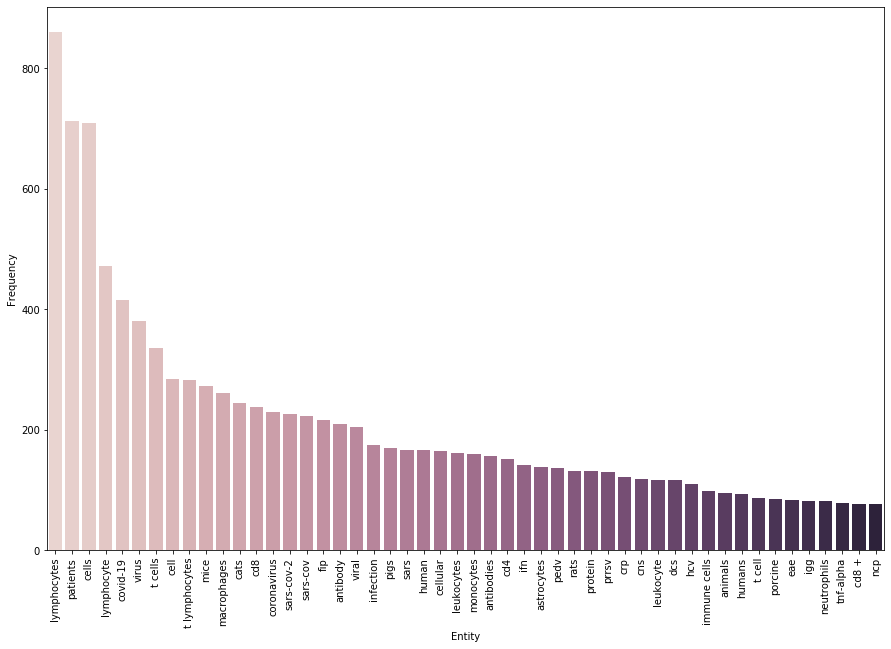

In [57]:
 uniq_entity_list = set()
 
 q_entity_list = []
 title_list = []
 body_list = []
 
 for index,search_result in enumerate(search_results):
     title = search_result.get('title', "")        
     title_list.append(title.strip())
     
     body = search_result.get('body', "")
     body_list.append(body)
             
     doc_ent_list = []
     
     for scimodel in scimodels.values(): 
         body_doc = scimodel(body)
         doc_ent_list = doc_ent_list + [e.text.lower() for e in body_doc.ents]
         
     uniq_entity_list.update(doc_ent_list)
     q_entity_list.extend(doc_ent_list)
 
 doc_df = pd.DataFrame(data=body_list, columns=['documents'])
 
 vectorizer = CountVectorizer(vocabulary=uniq_entity_list, analyzer='word', min_df=2, 
                              max_features = 5000, preprocessor=None, tokenizer=None, 
                              lowercase=True, stop_words=stopwords)
 
 vectors = vectorizer.fit_transform(doc_df['documents'].values)
 
 title_df = pd.DataFrame(data=title_list, columns=['title'])
 
 matrix_df = pd.DataFrame(data=vectors.toarray(), columns=vectorizer.get_feature_names())
 
 pca = PCA(n_components=3)
 pca_components = pca.fit_transform(vectors.toarray())
 
 # Scree Variance Plot
 var_df = pd.DataFrame({"variance": pca.explained_variance_ratio_, "PC":["PC1", "PC2", "PC3"]})       
     
 var_fig = px.bar(var_df, x='PC', y='variance', 
                   labels={'variance':'Variance Explained', 'PC':'Principal Components'} ,
                   title="Scree Plot")
 py.offline.iplot(var_fig)    

 x_axis = [o[0] for o in pca_components]
 y_axis = [o[1] for o in pca_components]
 z_axis = [o[2] for o in pca_components] 
 
 colors = ["r", "b", "c", "y", "m", ]
 
 #The Elbow method showed k = 3 as best
 kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 13)
 kmean_indices = kmeans.fit_predict(pca_components)    
 
 pca_dict = {'PC1': x_axis, 'PC2': y_axis, 'PC3': z_axis,'Title':title_list, 'Color':[colors[d] for d in kmean_indices]}
 pca_df = pd.DataFrame(pca_dict)
 fig = px.scatter_3d(pca_df, x="PC1", y="PC2", z='PC3',color='Color', hover_name="Title")
 py.offline.iplot(fig)
 
 #Bar Graphs of Entity Frequencies
 nerCntr = Counter(q_entity_list)
 freq_ners = nerCntr.most_common(50)

 x,y = zip(*freq_ners)
 x,y = list(x),list(y)

 plt.figure(figsize=(15,10))
 ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
 plt.xlabel('Entity')
 plt.xticks(rotation=90)
 plt.ylabel('Frequency')
 plt.show()